In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\TensorFlow_FILES\TensorFlow_FILES\DATA\cancer_classification.csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

<Axes: ylabel='Frequency'>

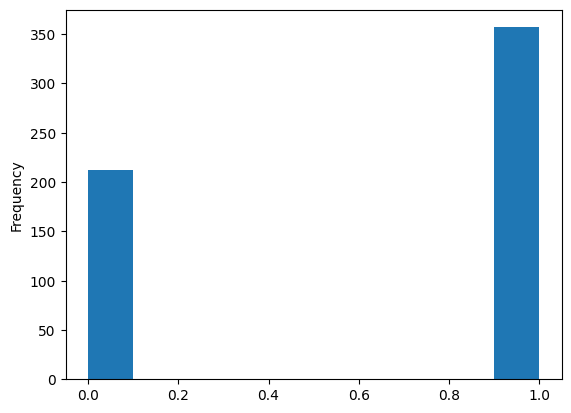

In [5]:
df["benign_0__mal_1"].plot(kind="hist")

<Axes: >

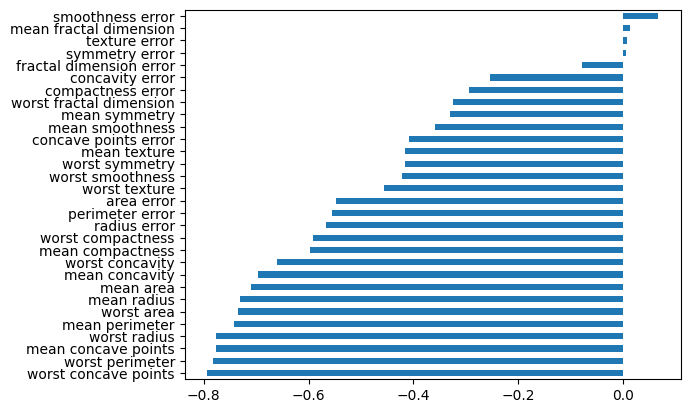

In [6]:
df.corr()["benign_0__mal_1"].sort_values()[:-1].plot(kind="barh")

In [7]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [10]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [11]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test)
          )

Epoch 1/600

14/14 [==============================] - 2s 26ms/step - loss: 0.7003 - val_loss: 0.6808
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6692 - val_loss: 0.6551
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6441 - val_loss: 0.6317
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6182 - val_loss: 0.6060
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5909 - val_loss: 0.5745
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5578 - val_loss: 0.5364
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5192 - val_loss: 0.4952
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4776 - val_loss: 0.4501
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4318 - val_loss: 0.4010
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3850 - val_loss: 0.3547
Epoch 1

<Axes: >

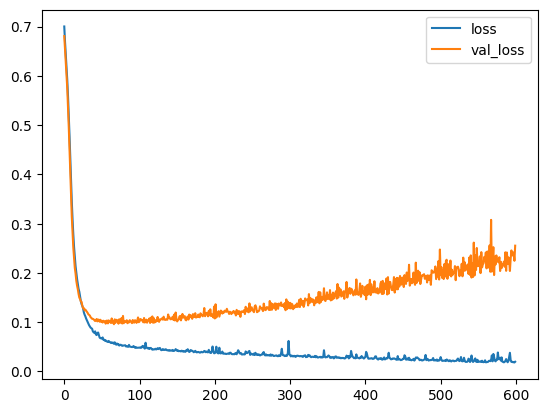

In [12]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [13]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [15]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test),callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6846 - val_loss: 0.6605
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6459 - val_loss: 0.6269
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6140 - val_loss: 0.5955
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5812 - val_loss: 0.5604
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5431 - val_loss: 0.5184
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4996 - val_loss: 0.4674
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4404 - val_loss: 0.4014
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3816 - val_loss: 0.3548
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3394 - val_loss: 0.3082
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2989 - val_loss: 0.2773
Epoch 11

<Axes: >

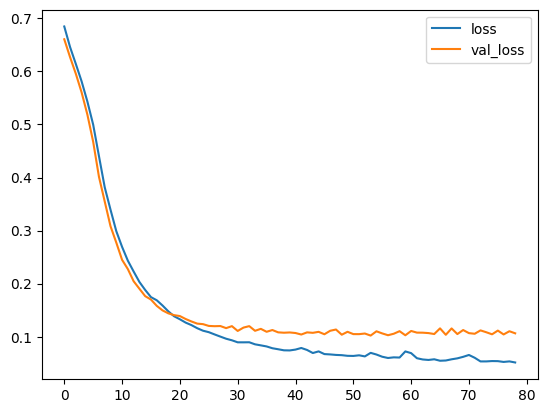

In [16]:
callb=pd.DataFrame(model.history.history)
callb.plot()

In [17]:
model = Sequential()
from tensorflow.keras.layers import Dropout

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test),callbacks=[early_stop]
          )


Epoch 1/600
14/14 [==============================] - 2s 24ms/step - loss: 0.6838 - val_loss: 0.6697
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6652 - val_loss: 0.6571
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6551 - val_loss: 0.6411
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6361 - val_loss: 0.6143
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6263 - val_loss: 0.5820
Epoch 6/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5881 - val_loss: 0.5406
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5638 - val_loss: 0.5001
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5386 - val_loss: 0.4659
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5226 - val_loss: 0.4376
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4694 - val_loss: 0.4086
Epoch 1

<Axes: >

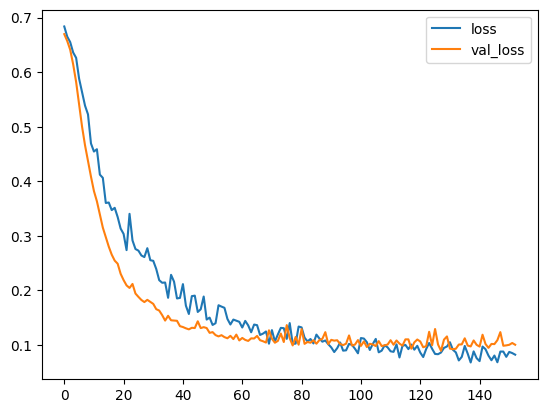

In [18]:
dro_df=pd.DataFrame(model.history.history)
dro_df.plot()

In [23]:
predictions = model.predict(X_test)  # Replace X_test with your test data
predicted_classes = (predictions > 0.5).astype(int).flatten()
predicted_classes

5/5 [==============================] - 0s 3ms/step


array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
class_report = classification_report(y_test, predicted_classes)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [26]:
from sklearn.metrics import classification_report, confusion_matrix
class1 = confusion_matrix(y_test, predicted_classes)
print("\nClassification Report:")
print(class1)


Classification Report:
[[54  1]
 [ 2 86]]
